## Week 2. Lab Code  
  
\* doc : https://docs.scipy.org/doc/scipy/reference/stats.html  

### Hw1. 

Tumor counts : trying to estimate the rate of tumorigenesis in two strains of mice A,B.
   
    #count data : A =10, B=13
    #A : well studied, Poisson-distributed with a mean of 12
    ### strong prior
    #B : unknown, but related to type A mice.
    ### weak prior

### a) find the posterior distributions, means, variancees and 95% quantile bvased confidence intervals for theta A and B.

In [34]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

# Likelihood
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

# prior parameters for thetaA ~ gamma(a1,b1)
# A : poisson distributed and mean is 12, E(thetaA) = 12 = a/b =12
# B : unknown, but related to type A mice. 
a1 = 120
b1 = 10
prior1 = st.gamma(a1, scale= 1/b1)

# prior parameters for thetaB ~ gamma(a2,b2)
# A : poisson distributed and mean is 12, E(thetaA) = 12 = a/b =12
a2 = 12
b2 = 1
prior2 = st.gamma(a2,scale= 1/b2)


# data in group A and posterior distribution
# n=number of mice, sy=sum of their numbers of Yi
nA = 10
syA = 117 #ya = (12,9,12,14,13,13,15,8,15,6)
postA = st.gamma(a1+syA, scale=1/(b1+nA))

# data in group B and posterior distribution
nB = 13 
syB = sum([11,11,10,9,9,8,7,10,6,8,8,9,7]) #113
postB = st.gamma(a2+syB, scale=1/(b2+nB))

**Group A Bayesian Analysis**

In [35]:
# posterior mean (Group A)
(a1+syA)/(b1+nA)

11.85

In [36]:
# posterior mode (Group A)
(a1+syA-1)/(b1+nA)

11.8

In [37]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA=gamma.ppf(0.025, a1+syA, scale=1/(b1+nA))
ubA=gamma.ppf(0.975, a1+syA, scale=1/(b1+nA))
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

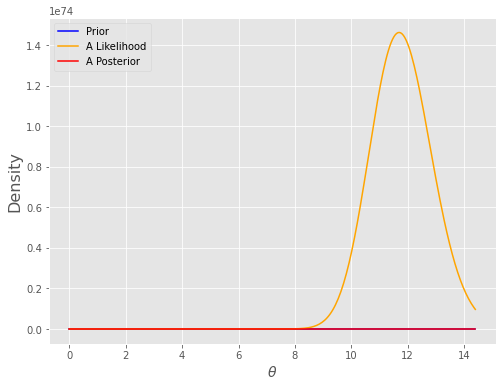

In [45]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='Prior', c='blue')

# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetas, likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

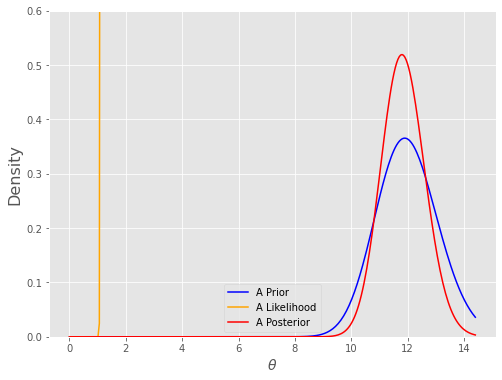

In [44]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='A Prior', c='blue')
plt.plot(thetas, likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.ylim([0, 0.6])
plt.legend();

**Group B Bayesian Analysis**

In [46]:
# posterior mean (Group B)
(a2+syB)/(b2+nB)

8.928571428571429

In [47]:
# posterior mode (Group B)
(a2+syB-1)/(b2+nB)

8.857142857142858

In [48]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB=gamma.ppf(0.025, a2+syB, scale=1/(b2+nB))
ubB=gamma.ppf(0.975, a2+syB, scale=1/(b2+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

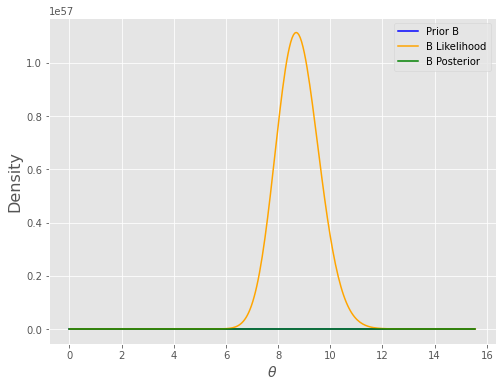

In [55]:
thetas = np.linspace(0.001, ubB+5, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior2.pdf(thetas), label='Prior B', c='blue')

# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetas, likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Comparing Two Posterior Distributions**

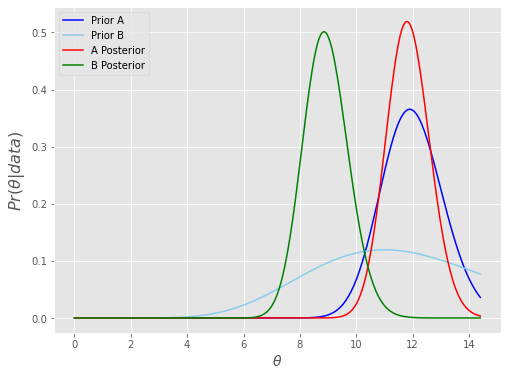

In [53]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='Prior A', c='blue')
plt.plot(thetas, prior2.pdf(thetas), label='Prior B', c='skyblue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

**b) Compute and plot the posterioor expectation of theta B under theta B~ gamma(12*n0,n0)**

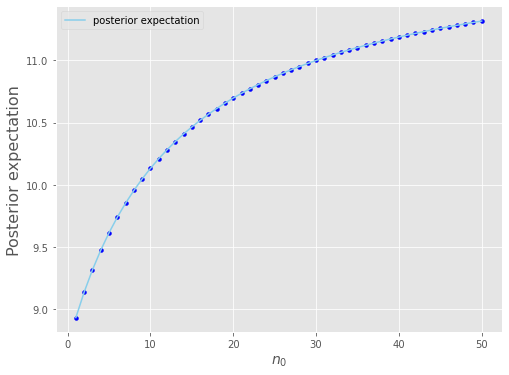

In [65]:
nzeros = np.linspace(1, 50, 50) # n0={1,2,3,,,,,50}

plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

#describe what sort of prior beliefs about theta B would be necessary in order of the 
#posterior expectation of thetaB 

#gamma expectation = a/b
plt.plot(nzeros, (12*nzeros+syB)/(nzeros+nB), label='posterior expectation', c='skyblue')
plt.scatter(nzeros, (12*nzeros+syB)/(nzeros+nB), c='blue', s=15)
plt.xlabel(r'$n_{0}$', fontsize=14)
plt.ylabel("Posterior expectation", fontsize=16)
plt.legend();

#### c. Discuss whether or not it makes sense to have 
    p(thetaA,thetaB) = p(thetaA)x p(thetaB)

theta A 와 thetaB가 독립인지 물어보는 것인데, A가 연구가 잘 되어 더 정확하고 큰 prior 을 주었고 B가 이와 관련되었다는 것을 알 수 있다. 하지만 이를 통해서 모든것을 정확히 알 수는 없기 때문에, 독립이라고 보아도 무방하다. 

## 2. Data 가 binomial distribution 일 때, likelihood 를 exponential families 형태로 변환해보기. 

<img src="./PNG 이미지.PNG"  width="700" height="370">


### 3. 증명 문제들

<img src="./PNG 이미지 2.PNG"  width="700" height="370">

